In [ ]:
 import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_csv('BTC-USD.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400
...,...,...,...,...,...,...,...
1457,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265
1458,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985
1459,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802
1460,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637


In [ ]:
lags = 3

In [ ]:
numeric_feature_names = df.columns[1:6]

In [ ]:
numeric_feature_names

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [ ]:
 for i in range(1, lags + 1):
  for col in numeric_feature_names:
    df[f'{col}_lag_{i}'] = df[col].shift(i)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag_1,High_lag_1,Low_lag_1,...,Open_lag_2,High_lag_2,Low_lag_2,Close_lag_2,Adj Close_lag_2,Open_lag_3,High_lag_3,Low_lag_3,Close_lag_3,Adj Close_lag_3
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096,780.005005,782.033997,776.838989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200,780.070007,781.434998,777.802002,...,780.005005,782.033997,776.838989,781.481018,781.481018,NaN,NaN,NaN,NaN,NaN
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800,778.963013,785.031982,778.963013,...,780.070007,781.434998,777.802002,778.088013,778.088013,780.005005,782.033997,776.838989,781.481018,781.481018
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400,785.166016,792.508972,784.864014,...,778.963013,785.031982,778.963013,784.906982,784.906982,780.070007,781.434998,777.802002,778.088013,778.088013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265,18320.884766,18626.292969,17935.546875,...,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531,19343.128906,19411.828125,18931.142578,19191.630859,19191.630859
1458,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985,18553.298828,18553.298828,17957.064453,...,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531
1459,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802,18263.929688,18268.453125,17619.533203,...,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016
1460,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637,18051.320313,18919.550781,18046.041016,...,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Open_lag_1,High_lag_1,Low_lag_1,...,Open_lag_2,High_lag_2,Low_lag_2,Close_lag_2,Adj Close_lag_2,Open_lag_3,High_lag_3,Low_lag_3,Close_lag_3,Adj Close_lag_3
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800,778.963013,785.031982,778.963013,...,780.070007,781.434998,777.802002,778.088013,778.088013,780.005005,782.033997,776.838989,781.481018,781.481018
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400,785.166016,792.508972,784.864014,...,778.963013,785.031982,778.963013,784.906982,784.906982,780.070007,781.434998,777.802002,778.088013,778.088013
5,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,74886400,791.007996,794.737000,788.026001,...,785.166016,792.508972,784.864014,790.828979,790.828979,778.963013,785.031982,778.963013,784.906982,784.906982
6,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,99629296,790.692017,793.611023,790.320007,...,791.007996,794.737000,788.026001,790.530029,790.530029,785.166016,792.508972,784.864014,790.828979,790.828979
7,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000,792.247009,801.336975,791.497009,...,790.692017,793.611023,790.320007,792.713989,792.713989,791.007996,794.737000,788.026001,790.530029,790.530029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265,18320.884766,18626.292969,17935.546875,...,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531,19343.128906,19411.828125,18931.142578,19191.630859,19191.630859
1458,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985,18553.298828,18553.298828,17957.064453,...,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531
1459,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802,18263.929688,18268.453125,17619.533203,...,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016
1460,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637,18051.320313,18919.550781,18046.041016,...,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188


In [ ]:
numeric_feature_names = df.columns[7:]

In [ ]:
numeric_feature_names

Index(['Open_lag_1', 'High_lag_1', 'Low_lag_1', 'Close_lag_1',
       'Adj Close_lag_1', 'Open_lag_2', 'High_lag_2', 'Low_lag_2',
       'Close_lag_2', 'Adj Close_lag_2', 'Open_lag_3', 'High_lag_3',
       'Low_lag_3', 'Close_lag_3', 'Adj Close_lag_3'],
      dtype='object')

In [ ]:
X= df[numeric_feature_names]
Y=df[['Close']]

In [ ]:
X

,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_1,Adj Close_lag_1,Open_lag_2,High_lag_2,Low_lag_2,Close_lag_2,Adj Close_lag_2,Open_lag_3,High_lag_3,Low_lag_3,Close_lag_3,Adj Close_lag_3
3,778.963013,785.031982,778.963013,784.906982,784.906982,780.070007,781.434998,777.802002,778.088013,778.088013,780.005005,782.033997,776.838989,781.481018,781.481018
4,785.166016,792.508972,784.864014,790.828979,790.828979,778.963013,785.031982,778.963013,784.906982,784.906982,780.070007,781.434998,777.802002,778.088013,778.088013
5,791.007996,794.737000,788.026001,790.530029,790.530029,785.166016,792.508972,784.864014,790.828979,790.828979,778.963013,785.031982,778.963013,784.906982,784.906982
6,790.692017,793.611023,790.320007,792.713989,792.713989,791.007996,794.737000,788.026001,790.530029,790.530029,785.166016,792.508972,784.864014,790.828979,790.828979
7,792.247009,801.336975,791.497009,800.875977,800.875977,790.692017,793.611023,790.320007,792.713989,792.713989,791.007996,794.737000,788.026001,790.530029,790.530029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531,19343.128906,19411.828125,18931.142578,19191.630859,19191.630859
1458,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016,19191.529297,19283.478516,18269.945313,18321.144531,18321.144531
1459,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,18320.884766,18626.292969,17935.546875,18553.916016,18553.916016
1460,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188


In [ ]:
Y

,Close
3,790.828979
4,790.530029
5,792.713989
6,800.875977
7,834.281006
...,...
1457,18264.992188
1458,18058.904297
1459,18803.656250
1460,19142.382813


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=False, test_size=0.2)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mae', optimizer='adam')


In [ ]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30
10/10 - 4s - loss: 5225.6050 - val_loss: 7914.2275 - 4s/epoch - 385ms/step
Epoch 2/30
10/10 - 0s - loss: 4759.6274 - val_loss: 7097.3149 - 82ms/epoch - 8ms/step
Epoch 3/30
10/10 - 0s - loss: 4169.9067 - val_loss: 5970.7559 - 78ms/epoch - 8ms/step
Epoch 4/30
10/10 - 0s - loss: 3317.5002 - val_loss: 4280.9980 - 78ms/epoch - 8ms/step
Epoch 5/30
10/10 - 0s - loss: 1787.2264 - val_loss: 1268.9092 - 94ms/epoch - 9ms/step
Epoch 6/30
10/10 - 0s - loss: 408.3670 - val_loss: 758.7799 - 82ms/epoch - 8ms/step
Epoch 7/30
10/10 - 0s - loss: 485.5738 - val_loss: 491.6111 - 87ms/epoch - 9ms/step
Epoch 8/30
10/10 - 0s - loss: 298.6486 - val_loss: 320.0584 - 93ms/epoch - 9ms/step
Epoch 9/30
10/10 - 0s - loss: 297.4666 - val_loss: 344.7021 - 77ms/epoch - 8ms/step
Epoch 10/30
10/10 - 0s - loss: 313.0612 - val_loss: 307.1541 - 83ms/epoch - 8ms/step
Epoch 11/30
10/10 - 0s - loss: 293.9442 - val_loss: 328.7747 - 83ms/epoch - 8ms/step
Epoch 12/30
10/10 - 0s - loss: 311.8066 - val_loss: 306.3276 - 1

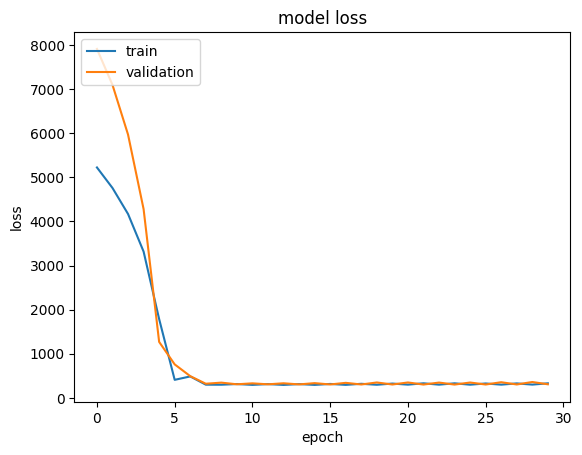

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

10/10 [==============================] - 0s 2ms/step


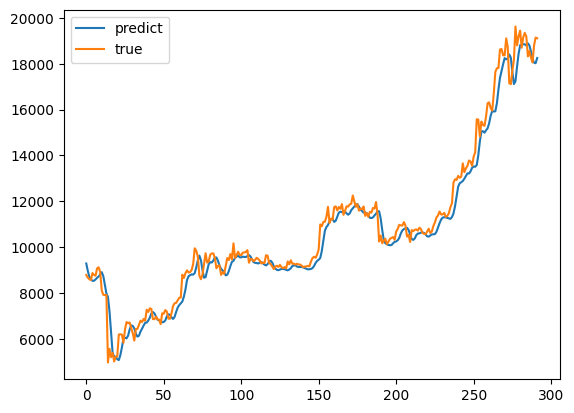

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred,Y_test)

0.9697193368038316